In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [4]:
train

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [5]:
X=train.iloc[:,1:-1]
X

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21
...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53
410,1.024,5.53,577,19.7,224,0.77
411,1.018,6.28,455,22.2,270,7.68
412,1.008,7.12,325,12.6,75,1.03


In [6]:
Y=train['target']
Y

0      0
1      0
2      0
3      1
4      1
      ..
409    0
410    0
411    1
412    1
413    0
Name: target, Length: 414, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((331, 6), (83, 6), (331,), (83,))

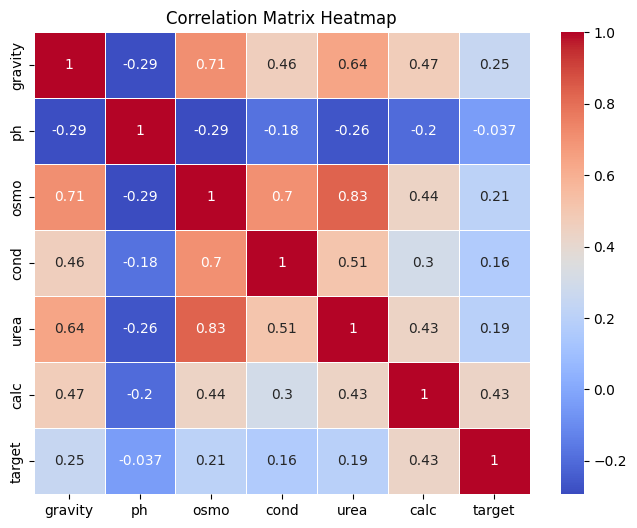

In [8]:
# Calculate the correlation matrix
correlation_matrix = (pd.concat([X_train, Y_train], axis=1)).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
models={}

from sklearn.linear_model import LogisticRegression
models['LogisticRegression']=LogisticRegression(max_iter=150)

from sklearn.svm import LinearSVC
models['SVM']=LinearSVC()

from sklearn.tree import DecisionTreeClassifier
models['DecisionTree']=DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
models['RandomForest']=RandomForestClassifier()

from sklearn.naive_bayes import GaussianNB
models['naive_bayes']=GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
models['KNN']=KNeighborsClassifier()

In [10]:
accuracy,precision,recall={},{},{}
from sklearn.metrics import accuracy_score,precision_score,recall_score
for key in models:
    models[key].fit(X_train,Y_train)
    Y_predict=models[key].predict(X_test)
    accuracy[key]=accuracy_score(Y_test,Y_predict)
    precision[key]=precision_score(Y_test,Y_predict)
    recall[key]=recall_score(Y_test,Y_predict)
    

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
model_metrics=pd.DataFrame(index=models.keys(),columns=['accuracy','precision','recall'])
model_metrics.accuracy=accuracy.values()
model_metrics.precision=precision.values()
model_metrics.recall=recall.values()
model_metrics

,accuracy,precision,recall
LogisticRegression,0.783133,0.812500,0.684211
SVM,0.626506,1.000000,0.184211
DecisionTree,0.674699,0.648649,0.631579
RandomForest,0.722892,0.727273,0.631579
naive_bayes,0.783133,0.763158,0.763158
KNN,0.626506,0.629630,0.447368


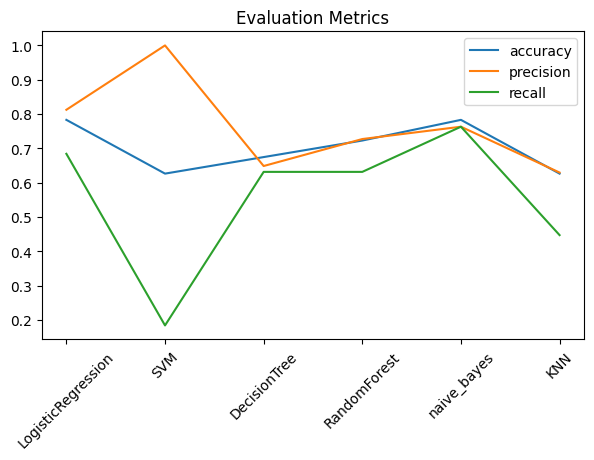

In [12]:
model_metrics.plot(figsize=(7,4),rot=45)
plt.title('Evaluation Metrics');